## GCL Segmentation

In [1]:
# Imports
import os
import sys
from pathlib import Path
import glob
import re           # Regular expression
import numpy as np
from PIL import Image
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import io as skio
from skimage import transform as transform
import scipy.stats as stats
import scipy.signal
import scipy.interpolate as interpolate

C:\Users\tnemeth\Miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Functions
def _extract_enface(vol, surface_depths, kernel = 3):  
    enface = np.zeros((vol.shape[1], vol.shape[2]), dtype = vol.dtype)
    enface[enface == 0] = np.nan
    for x in range(vol.shape[1]):
        for y in range(vol.shape[2]):
            z = np.rint(surface_depths[x,y]).astype(int)
            depth_range = np.arange(z - kernel, z + kernel + 1)
            enface[x,y] = np.nanmean(vol[depth_range, x, y])
    return enface   

def get_smooth_surface(image):
    # 2d interpolation
    valid_mask = ~np.isnan(image)
    coords = np.array(np.nonzero(valid_mask)).T
    values = image[valid_mask]
    
    it = interpolate.LinearNDInterpolator(coords, values, fill_value= 0)
    
    surface_z_map_filled = it(list(np.ndindex(image.shape))).reshape(image.shape)
    
    # Median filter
    surface_z_map_filled_filtered = scipy.ndimage.median_filter(surface_z_map_filled, 20)

    return surface_z_map_filled_filtered

In [3]:
filepath = "iu_test_data_enface.tif"

reflectance = skio.imread(filepath)
depth_of_interest = np.arange(137,260)
    
surface_map = np.zeros((reflectance.shape[1], reflectance.shape[2]))
surface_z_map = np.zeros((reflectance.shape[1], reflectance.shape[2]) )

for x in range(reflectance.shape[1]):
    for y in range(reflectance.shape[2]):
        ascan_amplitude = reflectance[depth_of_interest, x, y]
        
        peaks, properties = scipy.signal.find_peaks(ascan_amplitude, 
                                                    height = (75, None), 
                                                    prominence = (0, None), 
                                                    distance = 1)
        if len(peaks) < 1:
            slope = 0
            surface_map[x,y]   = np.nan
            surface_z_map[x,y] = np.nan
        else:            
            surface_map[x,y] = ascan_amplitude[peaks[0]]
            surface_z_map[x,y] = peaks[0]

print("done!")

done!


## Figures

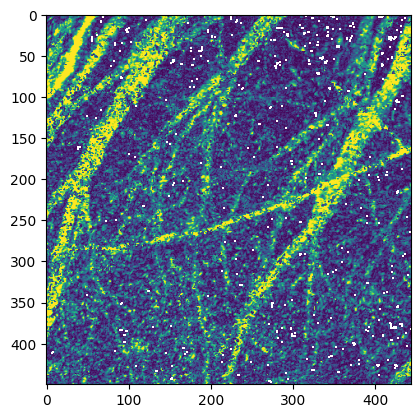

In [4]:
plt.figure()
plt.imshow(surface_map)
plt.pause(0.1)

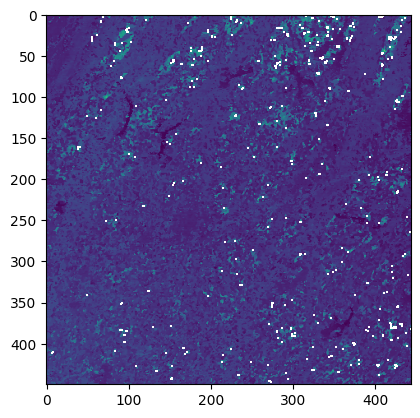

In [5]:
plt.figure()
plt.imshow(surface_z_map)
plt.pause(0.1)

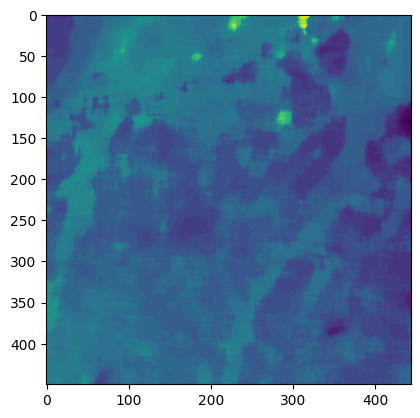

In [6]:
surface_z_map_filled_filtered = get_smooth_surface(surface_z_map) 
plt.figure()
plt.imshow(surface_z_map_filled_filtered)

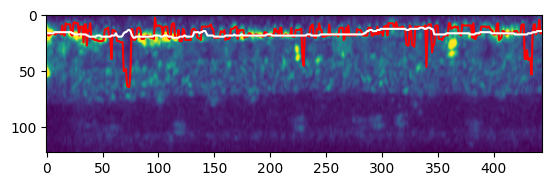

In [7]:
plt.figure()
plt.imshow(reflectance[depth_of_interest, 100,:])
plt.plot(surface_z_map[100,:], 'r-')
plt.plot(surface_z_map_filled_filtered[100,:], 'w-')

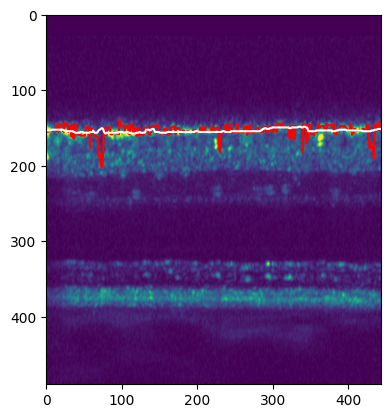

In [8]:
plt.figure()
plt.imshow(reflectance[:, 100,:])
plt.plot(surface_z_map[100,:] + depth_of_interest[0], 'r-')
plt.plot(surface_z_map_filled_filtered[100,:] + depth_of_interest[0], 'w-')
surface = surface_z_map_filled_filtered + depth_of_interest[0]
#np.save(filepath.replace('volume', 'surface').replace('.tif', '.npy'), surface.T)

# IPL Segmentation (Bottom)

In [9]:
filepath = "iu_test_data_enface.tif"
peak_index = 4

reflectance = skio.imread(filepath)
depth_of_interest = np.arange(137,260)
    
surface_map = np.zeros((reflectance.shape[1], reflectance.shape[2]))
surface_z_map = np.zeros((reflectance.shape[1], reflectance.shape[2]) )

for x in range(reflectance.shape[1]):
    for y in range(reflectance.shape[2]):
        ascan_amplitude = reflectance[depth_of_interest, x, y]
        peaks, properties = scipy.signal.find_peaks(ascan_amplitude, 
                                                    height = (60, None), 
                                                    prominence = (0, None), 
                                                    distance = 1)
        
        # Get the last peak found
        if len(peaks) < peak_index:
            slope = 0
            surface_map[x,y]   = np.nan
            surface_z_map[x,y] = np.nan
        else:            
            surface_map[x,y] = ascan_amplitude[peaks[len(peaks) - 1]]
            surface_z_map[x,y] = peaks[len(peaks) - 1]

print("done!")

done!


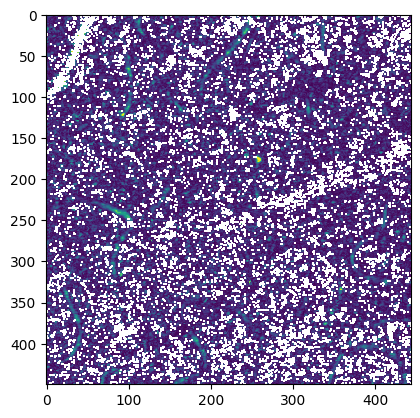

In [10]:
plt.figure()
plt.imshow(surface_map)
plt.pause(0.1)

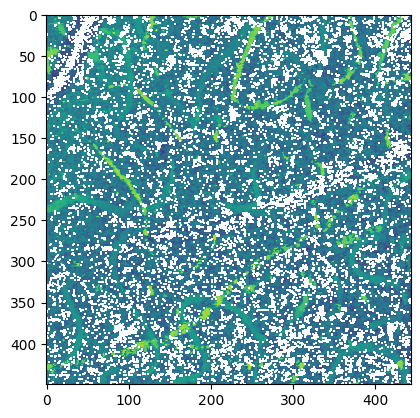

In [11]:
plt.figure()
plt.imshow(surface_z_map)
plt.pause(0.1)

In [27]:
# Load in the average image to refine the data
filepath = "AVG_iu_test_data.tif"

# Get 2d image
avg_z_project_data = skio.imread(filepath)
avg_z_project_data[:,100]

#peak_index = 4

#reflectance = skio.imread(filepath)
#depth_of_interest = np.arange(137,260)
    
#surface_map = np.zeros((reflectance.shape[1], reflectance.shape[2]))
#surface_z_map = np.zeros((reflectance.shape[1], reflectance.shape[2]) )

#for x in range(reflectance.shape[1]):
#    for y in range(reflectance.shape[2]):
#        ascan_amplitude = reflectance[depth_of_interest, x, y]
#        peaks, properties = scipy.signal.find_peaks(ascan_amplitude, 
#                                                    height = (60, None), 
#                                                    prominence = (0, None), 
#                                                    distance = 1)
        
        # Get the last peak found
#        if len(peaks) < peak_index:
#            slope = 0
#            surface_map[x,y]   = np.nan
#            surface_z_map[x,y] = np.nan
#        else:            
#            surface_map[x,y] = ascan_amplitude[peaks[len(peaks) - 1]]
#            surface_z_map[x,y] = peaks[len(peaks) - 1]

#print("done!")

array([  0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   0,   0,   1,   1,   1,
         1,   0,   1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   4,   4,   4,   4,   4,   4,
         5,   5,   5,   5,   6,   6,   6,   7,   8,   8,   9,  10,  11,
        11,  12,  13,  14,  16,  18,  20,  22,  24,  27,  29,  31,  33,
        36,  40,  46,  52,  60,  66,  72,  77,  82,  88,  95, 102, 108,
       113, 115, 114, 110, 105,  97,  90,  85,  82,  80,  78,  77,  76,
        76,  76,  76,  77,  78,  79,  81,  82,  82,  82,  82,  8

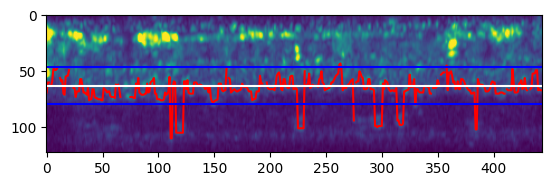

In [12]:
valid_mask_sz = ~np.isnan(surface_z_map)
values_sz = surface_z_map[valid_mask_sz]
sz_mean = np.mean(values_sz)
sz_std = np.std(values_sz)
sz_median = np.median(values_sz)

# Display a figure with the median, and +- 1.5 standard deviations

plt.figure()
plt.imshow(reflectance[depth_of_interest, 100,:])
plt.plot(surface_z_map[100,:], 'r-')
plt.axhline(y = sz_median, color = 'w', linestyle = '-')
plt.axhline(y = sz_median + 1.5*sz_std, color = 'b', linestyle = '-')
plt.axhline(y = sz_median - 1.5*sz_std, color = 'b', linestyle = '-')

In [13]:
# Edit the smooth surface function to remove outliers

def get_smooth_surface(image):    
    # 2d interpolation
    valid_mask = ~np.isnan(image)
    coords = np.array(np.nonzero(valid_mask)).T
    values = image[valid_mask]
    
    # Remove outliers
    values_median = np.median(values)
    values_std = np.std(values)
    v_i = 0
    for v in values:
        if (v > (values_median + 1.5*values_std)) or (v < (values_median - 1.5*values_std)):
            values[v_i] = values_median
        v_i += 1
    
    it = interpolate.LinearNDInterpolator(coords, values, fill_value= 0)
    
    surface_z_map_filled = it(list(np.ndindex(image.shape))).reshape(image.shape)
    
    # Median filter
    surface_z_map_filled_filtered = scipy.ndimage.maximum_filter(surface_z_map_filled, 2)
    surface_z_map_filled_filtered = scipy.ndimage.median_filter(surface_z_map_filled_filtered, 20)

    return surface_z_map_filled_filtered

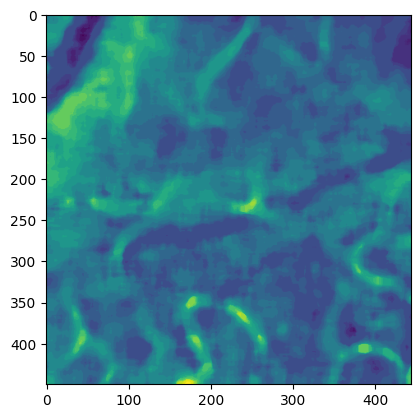

In [14]:
surface_z_map_filled_filtered = get_smooth_surface(surface_z_map) 
plt.figure()
plt.imshow(surface_z_map_filled_filtered)

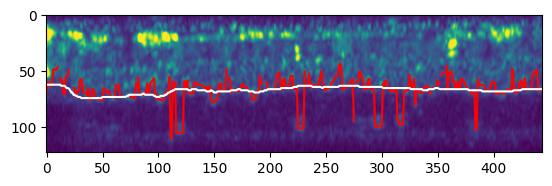

In [15]:
plt.figure()
plt.imshow(reflectance[depth_of_interest, 100,:])
plt.plot(surface_z_map[100,:], 'r-')
plt.plot(surface_z_map_filled_filtered[100,:], 'w-')

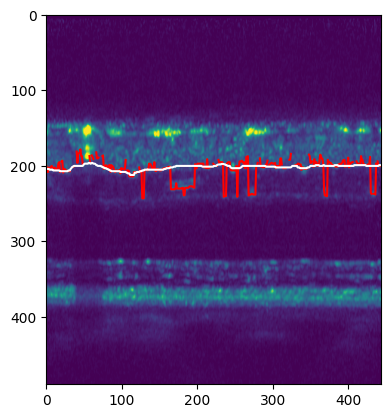

In [16]:
plt.figure()
plt.imshow(reflectance[:, 1,:])
plt.plot(surface_z_map[1,:] + depth_of_interest[0], 'r-')
plt.plot(surface_z_map_filled_filtered[1,:] + depth_of_interest[0], 'w-')
surface = surface_z_map_filled_filtered + depth_of_interest[0]
#np.save(filepath.replace('volume', 'surface').replace('.tif', '.npy'), surface.T)

# notice that the process generally works well, but performs poorly in the presence of shadows caused by vessels.
# One possible solution could be to dynamically set the peak thresholds for darker areas

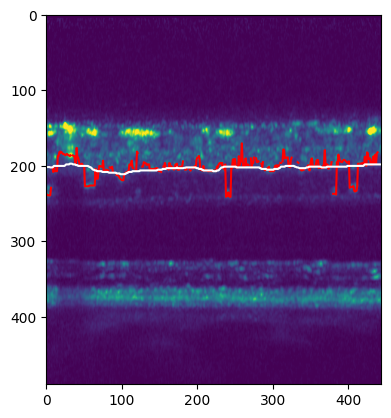

In [17]:
plt.figure()
plt.imshow(reflectance[:, 50,:])
plt.plot(surface_z_map[50,:] + depth_of_interest[0], 'r-')
plt.plot(surface_z_map_filled_filtered[50,:] + depth_of_interest[0], 'w-')

surface = surface_z_map_filled_filtered + depth_of_interest[0]
#np.save(filepath.replace('volume', 'surface').replace('.tif', '.npy'), surface.T)